In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cpu
0.20.1+cpu


# Getting Dataset

We're going to start with FashionMNIST.

MNIST stands for Modified National Institute of Standards and Technology.

The original MNIST dataset contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

FashionMNIST, made by Zalando Research, is a similar setup.

Except it contains grayscale images of 10 different kinds of clothing.

In [2]:
train_data = datasets.FashionMNIST(
    root='dataset/FashionMNIST', # dataset store dir path
    train=True,  						# train data
    download=True, 					# download in local
    transform=ToTensor(), 			# transfrom data to tensor
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='dataset/FashionMNIST', # dataset store dir path
    train=False, 						# train data
    transform=ToTensor(),			# transfrom data to tensor
    download=True,					# download in local
)

In [3]:
# traning samples
image , label = train_data[1]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
           0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
           0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
           1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
           0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
           0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
           0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
           0.7765, 0.7843, 0.7843, 0.7843, 

## Undarstanding Dataset

In [4]:
# model input shape
image.shape

torch.Size([1, 28, 28])

image has 1 color channel means it is a grayscale image and shape 28 X 28

In [5]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: dataset/FashionMNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
len(train_data.data), len(train_data.targets)

(60000, 60000)

In [7]:
len(test_data.data), len(test_data.targets)

(10000, 10000)

In [8]:
# num of classes
num_classes = train_data.classes
print(num_classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


we're working with 10 different classes, it means our problem is multi-class classification.

# Visualization

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'T-shirt/top')

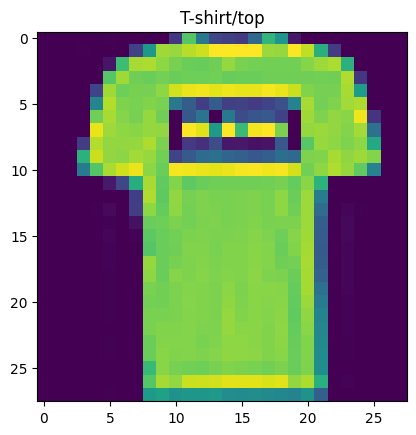

In [9]:
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(num_classes[label])

Text(0.5, 1.0, 'T-shirt/top')

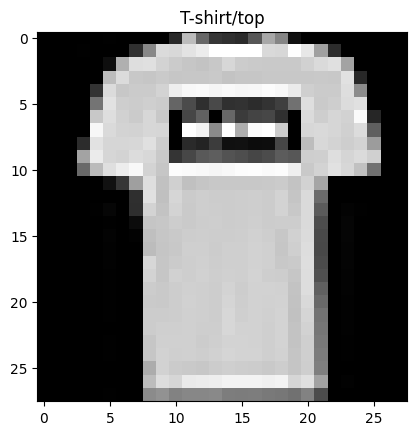

In [10]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(num_classes[label])

In [11]:
torch.randint(0,len(train_data),size=[1]).item()

36865

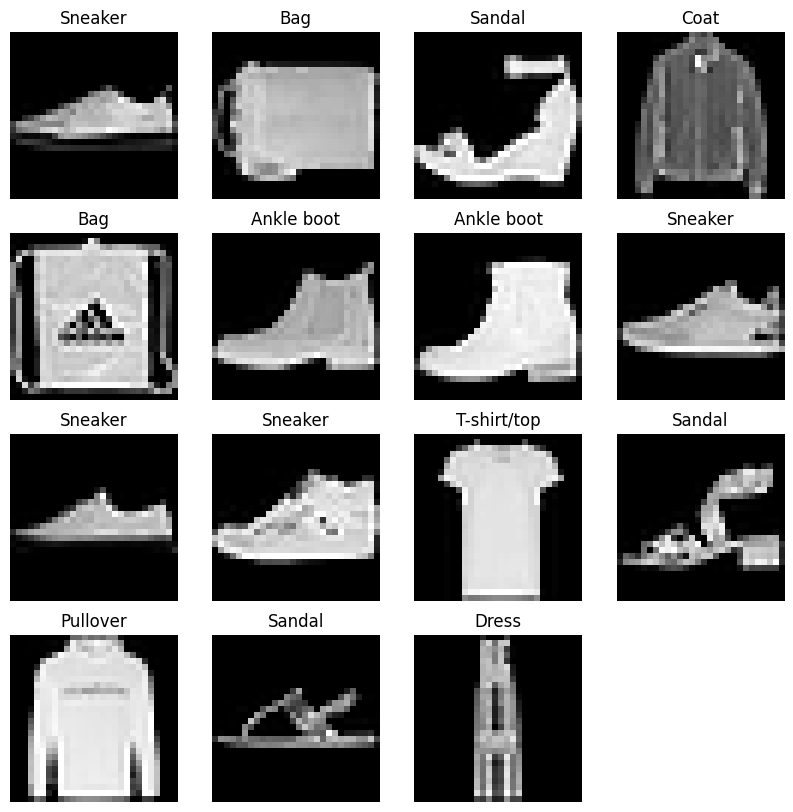

In [12]:
# plot more images
fig = plt.figure(figsize=(10,10))
 
for i in range(1,16):
    random_index = torch.randint(0,len(train_data),size=[1]).item()
    img , label = train_data[random_index]
    fig.add_subplot(4,4,i)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(num_classes[label])
    plt.axis(False)	 

# DataLoader

DataLoader helps load data into a model.

For training and for inference.

It turns a large Dataset into a Python iterable of smaller chunks.

These smaller chunks are called batches or mini-batches and can be set by the batch_size parameter.

**Why do this?**
- Because it's more computationally efficient.

- In an ideal world you could do the forward pass and backward pass across all of your data at once.But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

- It also gives your model more opportunities to improve.

With mini-batches (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

In [13]:
from torch.utils.data import DataLoader

# setup batch size
batch_size = 32

# Turn data into itarabels
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size= batch_size,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    shuffle=False,
    batch_size=batch_size
)

In [14]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {batch_size}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {batch_size}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002B70968CB90>, <torch.utils.data.dataloader.DataLoader object at 0x000002B70914CDD0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [15]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


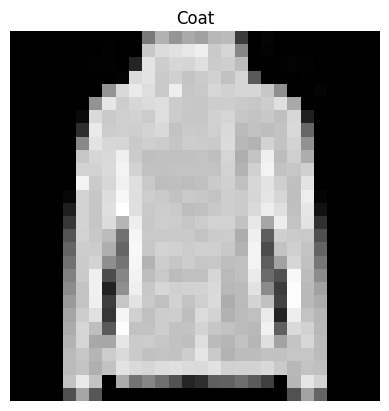

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(num_classes[label])
plt.axis("Off")
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

#  Build a baseline model

In [17]:
# create flatten layer

fltten_layer = nn.Flatten()

# getting single sample
x = train_features_batch[0]
# flattent op
output = fltten_layer(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")



Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [18]:
class BaseLineModel(nn.Module):
   def __init__(self,input_shape,hidden_units,output_shape):
      super().__init__()
      self.linear_layer = nn.Sequential(
         nn.Flatten(),
         nn.Linear(in_features=input_shape,out_features=hidden_units),
         nn.Linear(in_features=hidden_units,out_features=output_shape)
		)
   def forward(self,x):
      return self.linear_layer(x)

In [19]:
model_v1 = BaseLineModel(input_shape=28*28,
                         hidden_units=10,
                         output_shape=len(num_classes))
model_v1

BaseLineModel(
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Setup loss, optimizer and evaluation metrics

In [20]:
from helper_functions import accuracy_fn

# setup loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(model_v1.parameters(),lr=0.1)


## Mesuring Expariment Time Function
timing function to measure the time it takes our model to train on CPU versus using a GPU.

We'll train this model on the CPU but the next one on the GPU and see what happens.

In [21]:
from timeit import default_timer as timer 

def mesure_train_time(start, end, device=None):
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time

## Traning Loop

- Now Our data batches are contained within our DataLoaders, train_dataloader and test_dataloader for the training and test data splits respectively.
- A batch is BATCH_SIZE samples of X (features) and y (labels), since we're using BATCH_SIZE=32, our batches have 32 samples of images and targets.
- we're computing on batches of data, our loss and evaluation metrics will be calculated per batch rather than across the whole dataset.

In [22]:
import torch
from tqdm import tqdm
from time import time as timer

# Start timer
train_timer_start = timer()

# Number of epochs
epochs = 3

for epoch in range(epochs):
    print(f'Epoch: {epoch + 1}....')

    # Training
    train_loss, train_acc = 0,0
    model_v1.train()

    for batch, (x, y) in enumerate(train_dataloader):
        y_pred = model_v1(x)

        # Compute loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        train_acc += accuracy_fn(y,y_pred.argmax(dim=1))
        # Zero gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      
        if batch % 100 == 0:
            print(f"Looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples")
    # calculate avarage training loss and accuracy		
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    # Testing
    test_loss, test_accuracy = 0, 0

    with torch.no_grad():
        model_v1.eval()
        for batch, (x, y) in enumerate(test_dataloader):
            test_pred = model_v1(x)
            test_loss += loss_fn(test_pred, y).item()
            test_accuracy += accuracy_fn(y, test_pred.argmax(dim=1))
		# calculate avarage testing loss and accuracy		
        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Train acc: {train_acc:.2f}| Test loss: {test_loss:.5f} | Test acc: {test_accuracy:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_v1 = mesure_train_time(
    start=train_timer_start,
    end=train_time_end_on_cpu,
    device=str(next(model_v1.parameters()).device)
)


Epoch: 1....
Looked at 0/60000 samples
Looked at 3200/60000 samples
Looked at 6400/60000 samples
Looked at 9600/60000 samples
Looked at 12800/60000 samples
Looked at 16000/60000 samples
Looked at 19200/60000 samples
Looked at 22400/60000 samples
Looked at 25600/60000 samples
Looked at 28800/60000 samples
Looked at 32000/60000 samples
Looked at 35200/60000 samples
Looked at 38400/60000 samples
Looked at 41600/60000 samples
Looked at 44800/60000 samples
Looked at 48000/60000 samples
Looked at 51200/60000 samples
Looked at 54400/60000 samples
Looked at 57600/60000 samples

Train loss: 0.59309 | Train acc: 79.01| Test loss: 0.50279 | Test acc: 82.44%

Epoch: 2....
Looked at 0/60000 samples
Looked at 3200/60000 samples
Looked at 6400/60000 samples
Looked at 9600/60000 samples
Looked at 12800/60000 samples
Looked at 16000/60000 samples
Looked at 19200/60000 samples
Looked at 22400/60000 samples
Looked at 25600/60000 samples
Looked at 28800/60000 samples
Looked at 32000/60000 samples
Looked a

# Make prediction

In [23]:
import torch.utils.data.dataloader


def evalution(model:nn.Module, dataloader:torch.utils.data.dataloader,accuracy_fn):
   loss , accuracy = 0, 0
   model.eval()
   with torch.no_grad():
      for batch,(x,y) in enumerate(dataloader):
         y_pred = model(x)
         loss += loss_fn(y_pred,y).item()
         accuracy += accuracy_fn(y,y_pred.argmax(dim=1))
      loss /= len(dataloader)
      accuracy /=len(dataloader)
   return {
      'model':model,
      'model_loss': loss,
      'model_accuracy':accuracy
	}

In [24]:
# Calculate model 0 results on test dataset
model_v1_results = evalution(model=model_v1, dataloader=test_dataloader,accuracy_fn=accuracy_fn)
model_v1_results

{'model': BaseLineModel(
   (linear_layer): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): Linear(in_features=10, out_features=10, bias=True)
   )
 ),
 'model_loss': 0.47057073149151696,
 'model_accuracy': 83.41653354632588}

# Build Model with non-linearity

In [25]:
# Create a model with non-linear and linear layers
class BaseLineModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [26]:
num_classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [27]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [28]:
model_v2 = BaseLineModelV2(
    input_shape= 28*28,
	 hidden_units=10,
    output_shape=len(num_classes)
).to(device)

## optimizer and loss function

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_v2.parameters(),lr=0.1)

## Functionizing training and test loops

In [30]:
from time import time as timer
from typing import Callable
from helper_functions import accuracy_fn

def train(model: nn.Module, 
          dataloader: DataLoader, 
          loss_fn: Callable, 
          optimizer: torch.optim.Optimizer, 
          accuracy_fn: Callable, 
          device: torch.device):

    train_loss, train_accuracy = 0, 0
    model.train()  # Set model to training mode

    for batch, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)  # Move data to device
        
        # Forward pass
        y_pred = model(x)

        # Compute loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        train_accuracy += accuracy_fn(y, y_pred.argmax(dim=1))

        # Backpropagation
        optimizer.zero_grad()  # Reset gradients
        loss.backward()  # Compute gradients
        optimizer.step()  # Update parameters

    # Compute average loss and accuracy
    train_loss /= len(dataloader)
    train_accuracy /= len(dataloader)

    # Print results
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_accuracy:.2f}%")

    return {
        "Train loss": train_loss,
        "Train accuracy": train_accuracy
    }


In [31]:
from typing import Callable

def test(model: nn.Module, 
         dataloader: DataLoader, 
         loss_fn: Callable, 
         accuracy_fn: Callable, 
         device: torch.device):
    
    test_loss, test_accuracy = 0, 0
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():  # Disable gradient computation
        for batch, (x, y) in enumerate(dataloader):
            x, y = x.to(device), y.to(device)  # Move data to specified device
            
            # Forward pass (prediction)
            y_pred = model(x)
            
            # Compute loss and accuracy
            test_loss += loss_fn(y_pred, y).item()
            test_accuracy += accuracy_fn(y, y_pred.argmax(dim=1))

        # Compute average loss and accuracy
        test_loss /= len(dataloader)
        test_accuracy /= len(dataloader)

    # Print results
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_accuracy:.2f}%")

    return {
        "Test loss": test_loss,
        "Test accuracy": test_accuracy
    }


In [32]:
from tqdm import tqdm
train_timer_start = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
   print(f'Epoch:{epoch + 1}....')
   train_result=train(
      model=model_v2,
      dataloader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device
	)
   test_result = test(
      model=model_v2,
      dataloader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
	)
train_time_end_on_device = timer()
total_train_time_model_v2 = mesure_train_time(
   start=train_timer_start,
   end= train_time_end_on_device,
   device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:1....
Train loss: 2.30644 | Train accuracy: 10.05%


 33%|███▎      | 1/3 [00:44<01:28, 44.20s/it]

Test loss: 2.30259 | Test accuracy: 9.98%
Epoch:2....
Train loss: 2.30259 | Train accuracy: 10.00%


 67%|██████▋   | 2/3 [01:25<00:42, 42.25s/it]

Test loss: 2.30259 | Test accuracy: 9.98%
Epoch:3....
Train loss: 2.30259 | Train accuracy: 10.00%


100%|██████████| 3/3 [02:15<00:00, 45.26s/it]

Test loss: 2.30259 | Test accuracy: 9.98%
Train time on cpu: 135.811 seconds


## Make prediction

In [33]:
import torch.utils.data.dataloader


def evalution(model:nn.Module, dataloader:torch.utils.data.dataloader,accuracy_fn):
   loss , accuracy = 0, 0
   model = model.to(device)
   model.eval()
   with torch.no_grad():
      for batch,(x,y) in enumerate(dataloader):
         x,y = x.to(device) , y.to(device)
         y_pred = model(x)
         loss += loss_fn(y_pred,y).item()
         accuracy += accuracy_fn(y,y_pred.argmax(dim=1))
      loss /= len(dataloader)
      accuracy /=len(dataloader)
   return {
      'model':model,
      'model_loss': loss,
      'model_accuracy':accuracy
	}

In [34]:
model_v2_results = evalution(
    model=model_v2,
    accuracy_fn=accuracy_fn,
    dataloader=test_dataloader
)

In [35]:
model_v2_results

{'model': BaseLineModelV2(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ),
 'model_loss': 2.3025851257312033,
 'model_accuracy': 9.984025559105431}

# Building a Convolutional Neural Network 

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

In [36]:
class CnnModel(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int, output_shape:int):
      super().__init__()
      self.block_1 = nn.Sequential(
         nn.Conv2d(
            in_channels= input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
			),
      nn.ReLU(),
      nn.Conv2d(
           in_channels=hidden_units,
           out_channels=hidden_units,
           kernel_size=3,
           stride=1,
           padding=1
		),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,stride=2),
      )
      self.block_2 = nn.Sequential(
               nn.Conv2d(
                    in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    padding=1
		),
		nn.ReLU(),
      nn.Conv2d(
         in_channels=hidden_units,
         out_channels=hidden_units,
			kernel_size=3,
			padding=1
		),
      nn.ReLU(),
      nn.MaxPool2d(
         kernel_size=2
		) 
		)
      self.Fc = nn.Sequential(
         nn.Flatten(),
         nn.Linear(
            in_features=hidden_units*7*7,
            out_features=output_shape
			)
		)
    def forward(self,x):
      x = self.block_1(x)
      x = self.block_2(x)
      x = self.Fc(x)
      return x

In [37]:
model_v3 = CnnModel(
    input_shape=1,
    hidden_units=10,
    output_shape=len(num_classes)
)
model_v3

CnnModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

What does the "2d" in nn.Conv2d() stand for?
- The 2d is for 2-dimensional data. As in, our images have two dimensions: height and width.
- There's color channel dimension but each of the color channel dimensions have two dimensions too: height and width.
- For other dimensional data such as 1D for text or 3D for 3D objects

In [38]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [39]:
# create a conv layer with same dim 
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
	 kernel_size=3,
	 stride=1,
	 padding=0
)

In [40]:
conv_layer(test_image)

tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8552e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

In [41]:
test_image.shape

torch.Size([3, 64, 64])

In [42]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [43]:
# Pass test image with extra dimension through conv_layer
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [44]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [45]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict({'weight': tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],


In [46]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


In [47]:
# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])


In [48]:
# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


Notice the change in the shapes of what's happening in and out of a nn.MaxPool2d() layer.

The kernel_size of the nn.MaxPool2d() layer will affect the size of the output shape.

In our case, the shape halves from a 62x62 image to 31x31 image.

In [49]:
#  Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[2.2349, 0.0219],
          [0.3207, 0.1633]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[2.2349]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


What's happening here?

This is another important piece of the puzzle of neural networks.

Essentially, every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space.

In other words, take a lot of numbers (raw data) and learn patterns in those numbers, patterns that are predictive whilst also being smaller in size than the original values.

From an artificial intelligence perspective, you could consider the whole goal of a neural network to compress information.

## Setup a loss function and optimizer

In [50]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v3.parameters(), 
                             lr=0.1)

## Training and testing

In [51]:
time_timer_start = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
	print(f'Epoch:{epoch + 1}....')
	train_result=train(
		model=model_v3,
		dataloader=train_dataloader,
		loss_fn=loss_fn,
		optimizer=optimizer,
		accuracy_fn=accuracy_fn,
		device=device
	)
	test_result = test(
		model=model_v3,
		dataloader=test_dataloader,
		loss_fn=loss_fn,
		accuracy_fn=accuracy_fn,
		device=device
	)
train_time_end_on_device = timer()
total_train_time_model_v3 = mesure_train_time(
	start=train_timer_start,
	end= train_time_end_on_device,
	device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:1....
Train loss: 0.62393 | Train accuracy: 77.47%


 33%|███▎      | 1/3 [02:05<04:11, 125.92s/it]

Test loss: 0.41538 | Test accuracy: 84.52%
Epoch:2....
Train loss: 0.36150 | Train accuracy: 87.03%


 67%|██████▋   | 2/3 [05:09<02:39, 159.64s/it]

Test loss: 0.36349 | Test accuracy: 86.72%
Epoch:3....
Train loss: 0.32289 | Train accuracy: 88.30%


100%|██████████| 3/3 [08:10<00:00, 163.53s/it]

Test loss: 0.33924 | Test accuracy: 87.87%
Train time on cpu: 635.671 seconds


In [52]:
model_v3_results = evalution(
	 model=model_v3,
	 accuracy_fn=accuracy_fn,
	 dataloader=test_dataloader
)
model_v3_results

{'model': CnnModel(
   (block_1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (block_2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (Fc): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
   )
 ),
 'model_loss': 0.3392444746420025,
 'model_accuracy': 87.8694089456869}

# Compare model results and training time

In [53]:
import pandas as pd

compare_results = pd.DataFrame([model_v1_results,model_v2_results,model_v3_results])
compare_results

,model,model_loss,model_accuracy
0,BaseLineModel(\n (linear_layer): Sequential(\...,0.470571,83.416534
1,BaseLineModelV2(\n (layer_stack): Sequential(...,2.302585,9.984026
2,CnnModel(\n (block_1): Sequential(\n (0): ...,0.339244,87.869409


In [54]:
compare_results['train_time'] = [total_train_time_model_v1,total_train_time_model_v2,total_train_time_model_v3]

In [55]:
compare_results

,model,model_loss,model_accuracy,train_time
0,BaseLineModel(\n (linear_layer): Sequential(\...,0.470571,83.416534,99.860966
1,BaseLineModelV2(\n (layer_stack): Sequential(...,2.302585,9.984026,135.811406
2,CnnModel(\n (block_1): Sequential(\n (0): ...,0.339244,87.869409,635.671134


Performance-speed tradeoff
Something to be aware of in machine learning is the performance-speed tradeoff.

Generally, you get better performance out of a larger, more complex model (like we did with model_v2).

However, this performance increase often comes at a sacrifice of training speed and inference speed.

The training times you get will be very dependent on the hardware you use.

Generally, the more CPU cores you have, the faster your models will train on CPU. And similar for GPUs.

Text(0, 0.5, 'model')

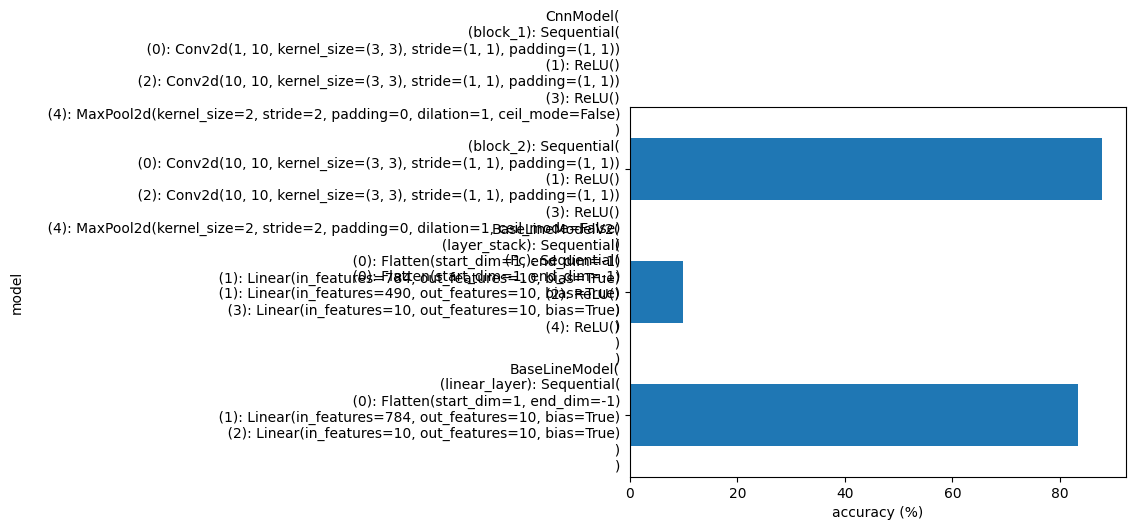

In [56]:
# Visualize our model results
compare_results.set_index("model")["model_accuracy"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

# evaluate random predictions 

In [64]:
def make_prediction(model:nn.Module,
                    data: list,
                    device:torch.device=device):
   pred_probs = []
   model.eval()
   with torch.no_grad():
      for sample in data:
         # prepare sample
         sample = torch.unsqueeze(sample,dim=0).to(device) # add extra dimension to sample
			# make prediction
         pred_logit = model(sample) # pass sample through model
         
			# get prediction probabilities (logit -> prediction probability)
         pred_prob = torch.softmax(pred_logit.squeeze(),dim=0) # squeeze to remove extra dimension
         
			# get pred probs 
         pred_probs.append(pred_prob.cpu()) # move to cpu and append to list
   return torch.stack(pred_probs)

In [58]:
import random
test_sample=[]
test_labels = []
for sample,label in random.sample(list(test_data),k=10):
    test_sample.append(sample)
    test_labels.append(label)

In [61]:
# View the first test sample shape and label
print(f"Test sample image shape: {test_sample[0].shape}\nTest sample label: {test_labels[0]} ({num_classes[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 3 (Dress)


In [65]:
# make prediction on sample test data
pred_prob = make_prediction(model=model_v3, data=test_sample)

In [66]:
pred_prob[:2]

tensor([[5.3210e-05, 5.5925e-04, 4.5137e-05, 9.9920e-01, 9.0278e-05, 8.3781e-06,
         1.8544e-06, 2.4441e-06, 2.9858e-06, 4.1142e-05],
        [9.9265e-06, 2.5543e-07, 7.8907e-07, 3.1121e-07, 6.5995e-07, 9.9983e-01,
         1.1607e-06, 4.8902e-05, 2.9846e-05, 7.6844e-05]])

In [67]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_prob.argmax(dim=1)
pred_classes

tensor([3, 5, 2, 0, 5, 7, 5, 0, 4, 7])

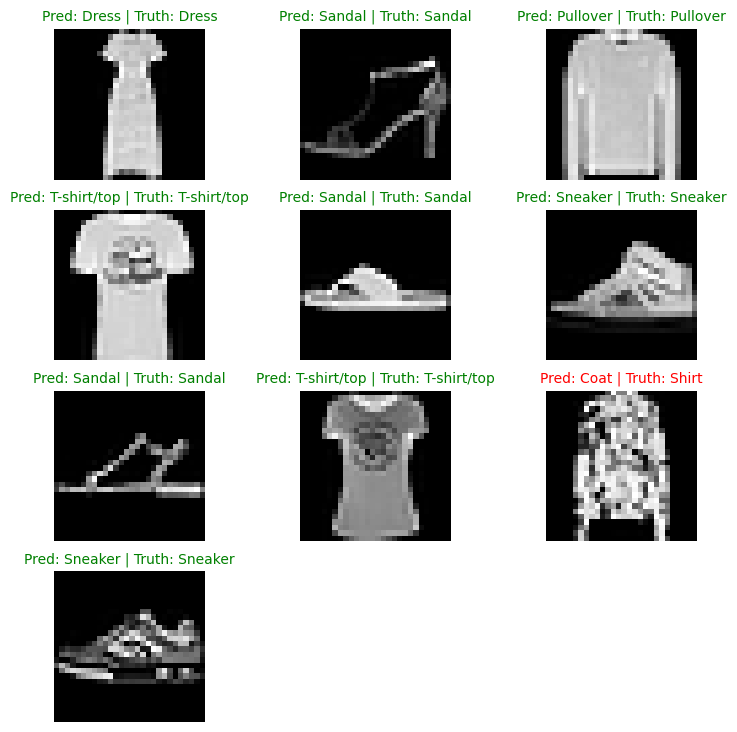

In [68]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 4
ncols = 3
for i, sample in enumerate(test_sample):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label 
  pred_label = num_classes[pred_classes[i]]

  # Get the truth label 
  truth_label = num_classes[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False)

# confusion matrix for further prediction evaluation

In [69]:
from tqdm.auto import tqdm

# make prediction on trained model
y_preds = []
model_v3.eval()
with torch.no_grad():
    for x,y in tqdm(test_dataloader,desc='Making predictions'):
        x , y = x.to(device), y.to(device)
        # forward pass
        y_logit = model_v3(x)
        # get prediction probabilities
        y_pred = torch.softmax(y_logit,dim=1).argmax(dim=1)
        # append to list
        y_preds.append(y_pred.cpu())
# concatenate all predictions into a single tensor
y_preds = torch.cat(y_preds)


e:\CV\cv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Making predictions: 100%|██████████| 313/313 [00:07<00:00, 41.01it/s]


In [70]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 578.7 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.4 MB 578.7 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.4 MB 578.7 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 500.8 kB/s eta 0:00:02
   ------------------------------- -------- 1.0/1.4 MB 621.7 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 734.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
import torchmetrics
import mlxtend

In [75]:
from torchmetrics import  ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion matrix
conf_mt = ConfusionMatrix(
    num_classes=len(num_classes),
    task='multiclass',
)

conf_mt_tensor = conf_mt(
    preds =y_preds,
	 target = test_data.targets
	)

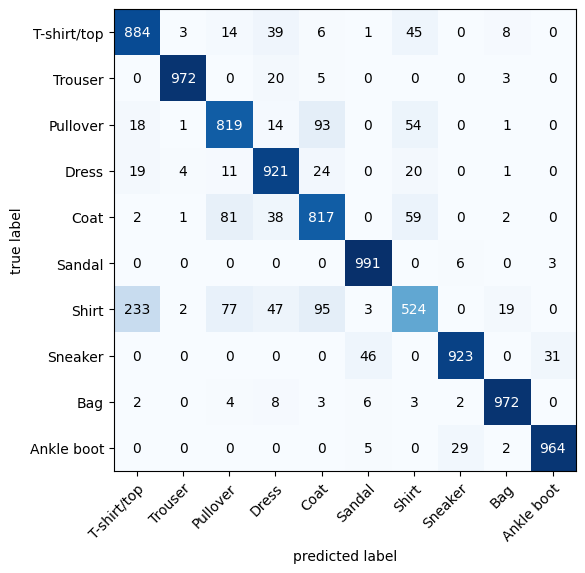

In [85]:
# plot confusion matrix
fig , ax = plot_confusion_matrix(
    conf_mat=conf_mt_tensor.numpy(), # convert to numpy array
	 class_names=num_classes,
	 figsize=(8,6),
	 cmap='Blues',
)

# Save and load best performing model

## Save Model

In [77]:
from pathlib import Path

# create model save path
model_path = Path('Models')
model_path.mkdir(parents=True, exist_ok=True)
# save model
model_name = 'cv_model.pth'
model_save_path = model_path/ model_name

torch.save(
    obj=model_v3.state_dict(), # save model state dict
    f=model_save_path
)

In [78]:
import os
os.path.getsize(model_save_path) / 1024**2 # in MB

0.03302574157714844

## Load Model

In [79]:
load_model = CnnModel(
	 input_shape=1,
	 hidden_units=10,
	 output_shape=len(num_classes)
)

load_model.load_state_dict(torch.load(model_save_path))
load_model.to(device)

C:\Users\www58\AppData\Local\Temp\ipykernel_26516\1661433302.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model.load_state_dict(torch.load(model_save_path))


CnnModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [83]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = evalution(
    model=load_model,
    dataloader=test_dataloader,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model': CnnModel(
   (block_1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (block_2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (Fc): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
   )
 ),
 'model_loss': 0.3392444746420025,
 'model_accuracy': 87.8694089456869}